In [4]:
import matplotlib.pyplot as plt

(array([0.66353333, 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.99863333, 0.        , 0.        , 0.67116667]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

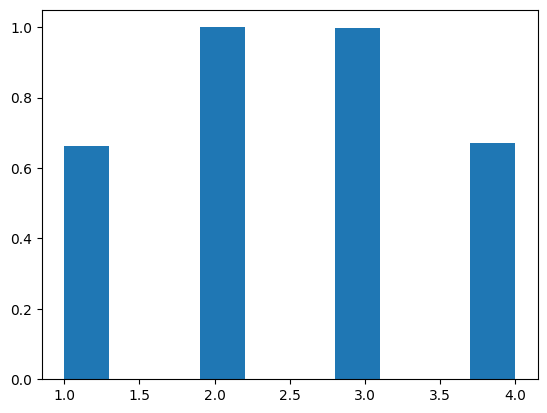

In [26]:
from vose_sampler import VoseAlias
# Example usage
dist = {1: 0.2, 2: 0.3, 3: 0.3, 4: 0.2}
VA = VoseAlias(dist)

# Sample 10 elements
samples = VA.sample_n(size=100000)

# Print the sample (might not reflect the exact probabilities due to randomness)
plt.hist(samples, density=True)


[0 0 1 0 0 0 0 1 2] [1.         0.40230046 0.41394305 0.79534297 0.63627437 0.53022864
 0.45448169 0.39767148 0.35348576]


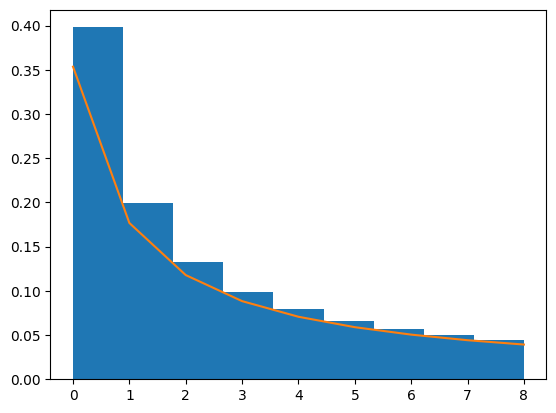

In [73]:
import numpy as np

def build_alias(probas):
    values = np.arange(len(probas)).tolist()
    dist = {v: p for v,p in zip(values, probas.tolist())}
    va = VoseAlias(dist)
    remap = va.table_alias
    thresholds = {k: float(i) for k,i in va.table_prob.items()}
    remap = np.array([(remap[i] if i in remap else i) for i in values])
    thresholds = np.array([(thresholds[i] if i in thresholds else 1.0) for i in values])
    return remap, thresholds


def sample(remap, thr, num_samples):
    index = np.random.randint(0, len(remap), size=(num_samples))
    unif = np.random.uniform(0,1, size=(num_samples))
    return np.where(unif > thr[index], remap[index], index)

v = np.arange(1, 10)
p = 1 / v # np.ones_like(v).astype(float)
p /= p.sum()



remap, thr = build_alias(p)
print(remap, thr)
plt.hist(sample(remap, thr, 1_000_000), bins=len(remap), density=True)
plt.plot(p)

In [43]:
import numpy as np
v = np.arange(1, 2_000_000)
p = 1/v
p /= p.sum()

In [44]:
build_alias(v.tolist(), p.tolist())

{1999999: 132574,
 132574: 132573,
 132573: 132572,
 132572: 132571,
 132571: 132570,
 132570: 132569,
 132569: 132568,
 132568: 132567,
 132567: 132566,
 132566: 132565,
 132565: 132564,
 132564: 132563,
 132563: 132562,
 132562: 132561,
 132561: 132560,
 132560: 132559,
 132559: 132558,
 132558: 132557,
 132557: 132556,
 132556: 132555,
 132555: 132554,
 132554: 132553,
 132553: 132552,
 132552: 132551,
 132551: 132550,
 132550: 132549,
 132549: 132548,
 132548: 132547,
 132547: 132546,
 132546: 132545,
 132545: 132544,
 132544: 132543,
 132543: 132542,
 132542: 132541,
 132541: 132540,
 132540: 132539,
 132539: 132538,
 132538: 132537,
 132537: 132536,
 132536: 132535,
 132535: 132534,
 132534: 132533,
 132533: 132532,
 132532: 132531,
 132531: 132530,
 132530: 132529,
 132529: 132528,
 132528: 132527,
 132527: 132526,
 132526: 132525,
 132525: 132524,
 132524: 132523,
 132523: 132522,
 132522: 132521,
 132521: 132520,
 132520: 132519,
 132519: 132518,
 132518: 132517,
 132517: 1325

In [24]:
remap = [remap[i] for i in sorted(remap.keys())]
remap

AttributeError: 'list' object has no attribute 'keys'

In [17]:
import numpy as np

def sample(remap, thresholds, num_samples):
    psi1 = np.random.randint(0, len(thresholds), size=(num_samples)).tolist()
    psi2 = np.random.uniform(size=(num_samples))


In [40]:
v = np.arange(1, 10)
p = 

array([nan,  0.,  0., ...,  0.,  0.,  0.])